# 자연어 처리
## 1. 영어
- NLTK
        말뭉치, 토큰생성, 형태소 분석, 품사 태깅

In [1]:
import nltk
nltk.download('book', quiet = True)

True

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')

* 말 뭉치들을 가지고 올 수 있다.

In [4]:
print(emma_raw[:1000])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

## 1.1. 토큰 생성

In [7]:
from nltk.tokenize import sent_tokenize
# print(sent_tokenize(emma_raw[:1000])[0]) # 하나의 문장으로 센트 토큰나이저를 해준다.
print(sent_tokenize(emma_raw[:1000])[3]) 

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [9]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[:1000])

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistin

In [11]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer('[\w]+') # 정규표현식을 사용해서 split해준다.
retokenize.tokenize(emma_raw[:1000])

['Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 'indulgent',
 'father',
 'and',
 'had',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 's',
 'marriage',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembrance',
 'of',
 'her',
 'caresses',
 'and',
 'her',
 'place',
 'had'

## 1.2. 형태소 분석

In [12]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'files', 'flying', 'flew', 'flown']

print([st1.stem(w) for w in words])
print([st2.stem(w) for w in words])

['fli', 'file', 'fli', 'flew', 'flown']
['fly', 'fil', 'fly', 'flew', 'flown']


* 원형을 잘 구분하지는 않는것 같다.

In [14]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos = 'v') for w in words]

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


['fly', 'file', 'fly', 'fly', 'fly']

* 원형을 찾기 위해서는 바로 위의 코드와 같은 경우가 있다.

## 1.3. 품사 부착

    - NNP : 단수 고유명사
    - VB : 동사
    - VBP : 동사현재형

In [16]:
nltk.help.upenn_tagset('VB') # help를 사용해서 어떤 기능인지 알 수 있다.

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [17]:
from nltk.tag import pos_tag
tagged_list = pos_tag(word_tokenize(emma_raw[:1000]))

In [18]:
tagged_list

[('[', 'NNS'),
 ('Emma', 'NNP'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 (']', 'NNP'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 (',', ','),
 ('handsome', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 (',', ','),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN'),
 (';', ':'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty-one', 'CD'),
 ('years', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP'),
 ('.', '.')

In [20]:
[i[0] for i in tagged_list if i[1] == 'NN']

['handsome',
 'clever',
 'home',
 'disposition',
 'existence',
 'world',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'period',
 'mother',
 'remembrance',
 'place',
 'woman',
 'governess',
 'mother',
 'affection',
 'family',
 'governess',
 'friend',
 'fond',
 'intimacy',
 'office',
 'governess',
 'mildness',
 'o']

In [21]:
from nltk.tag import untag
untag(tagged_list)

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistin

In [22]:
from nltk import Text
text = Text(retokenize.tokenize(emma_raw))

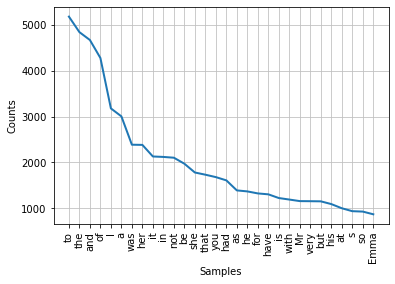

In [28]:
import matplotlib.pyplot as plt
text.plot(30)
plt.show()

* 토큰 나이즈된 것 중에서 상위 20개를 뽑아내 준다.

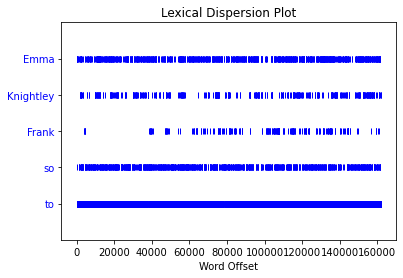

In [30]:
text.dispersion_plot(['Emma', 'Knightley', 'Frank', 'so', 'to']) # 단어가 나오는 위치들을 확인해 줄 수 있다.

* 단어들의 위치를 확인해 줄 수 있다.
* 빈도수가 낮은 Frank같은 것들은 뜨문뜨문 나오게 되는 것을 볼 수 있다.

In [31]:
text.concordance('Emma')

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

* Emma가 들어가 있는 단어들과 뒤에 들어가 있는 단어들을 보여준다.

In [32]:
text.similar('Emma')

she it he i harriet you her jane him that me and all they them herself
there but be isabella


* Emma가 들어가있는 것들 중에서 빈도가 높은 것을 출력해준다.

## 1.4. 빈도수 체크 



In [33]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [37]:
from nltk import FreqDist

stopwords = ['Mr.','Mrs.','Miss','Mr','Mrs','Deer']
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == 'NNP' and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [38]:
fd_names.N(), fd_names['Emma'], fd_names.freq('Emma')

(7881, 830, 0.10531658418982362)

In [39]:
names_list

['Jane',
 'Austen',
 'VOLUME',
 'Emma',
 'Woodhouse',
 'Sixteen',
 'Taylor',
 'Woodhouse',
 'Emma',
 'Between',
 'Taylor',
 'Emma',
 'Taylor',
 'Emma',
 'Sorrow',
 'Taylor',
 'Taylor',
 'Emma',
 'Weston',
 'Taylor',
 'A',
 'Isabella',
 'How',
 'Emma',
 'Weston',
 'Taylor',
 'Woodhouse',
 'Her',
 'London',
 'October',
 'November',
 'Hartfield',
 'Christmas',
 'Isabella',
 'Highbury',
 'Hartfield',
 'Taylor',
 'Emma',
 'Matrimony',
 'Taylor',
 'Taylor',
 'Hartfield',
 'Emma',
 'Poor',
 'Taylor',
 'Weston',
 'Weston',
 'Taylor',
 'A',
 'How',
 'Randalls',
 'No',
 'James',
 'Weston',
 'Weston',
 'James',
 'Randalls',
 'Hannah',
 'Nobody',
 'Hannah',
 'James',
 'James',
 'Whenever',
 'Taylor',
 'Whenever',
 'James',
 'Emma',
 'Knightley',
 'Isabella',
 'Highbury',
 'London',
 'Hartfield',
 'Brunswick',
 'Square',
 'Woodhouse',
 'Knightley',
 'Isabella',
 'Woodhouse',
 'Knightley',
 'Dirty',
 'Look',
 'Well',
 'Who',
 'Ah',
 'Taylor',
 'Tis',
 'Poor',
 'Woodhouse',
 'Taylor',
 'Emma',
 'Emma

In [40]:
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

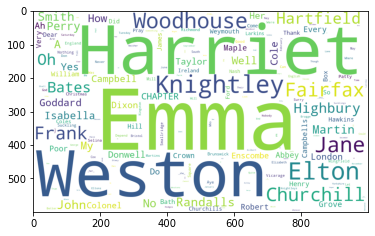

In [45]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color ='white')
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.show()

## 2. 한글
        - konlp
            tokenizing, 형태소 분석 등등

In [48]:
import warnings
warnings.simplefilter('ignore')
import konlpy
konlpy.__version__

'0.6.0'

* 한글과 같은 경우는 document를 찾아보면서 하면 좋다.

In [49]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [50]:
c = kolaw.open('constitution.txt').read()
print(c)

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.
  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.
  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.
②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.
  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.
②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.
  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.
②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.
  제8조 ① 정당의 설립은 자유이며, 복수정당제

In [51]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

* 등록 번호와 같은게 나오게 된다.

In [53]:
d = kobill.open('1809893.txt').read()
print(d)

남녀고용평등과 일 ·가정 양립 지원에 관한 법률 

일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9893

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  현행법상 근로자가 육아휴직을 신청할 수 있는 경우는 만 6세 이하

의 초등학교 취학 전 자녀를 양육하기 위한 경우임.

  그런데 초등학교 1․2학년의 경우 이들을 돌보는데 세심한 주의가 

필요함에도 불구하고 사회에서의 돌보는 제도가 부족하여 아동대상 

성폭력 등 범죄에 노출되어있고, 이로 인해 여성 근로자들은 직장생활

을 그만두고 있는 실정임. 또한 이는 여성 근로자들의 출산의욕을 저

하시키는 계기가 되고 있음.

  이에 자녀의 육아휴직 가능연령을 만 8세 이하로 상향조정하여 근

로자의 일․가정 양립 지원을 도모하고 나아가 저출산 대책에도 기여

하려는 것임(안 제19조제1항).

- 1 -

법률  제        호

남녀고용평등과 일 ·가정 양립 지원에 관한 법률 

일부개정법률안

남녀고용평등과 일·가정 양립 지원에 관한 법률 일부를 다음과 같이 

개정한다.

제19조제1항 본문 중 “만 6세 이하의 초등학교 취학 전”을 “만 8세 이

하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의”로 한다.

부      칙

이 법은 공포한 날부터 시행한다.

- 3 -

신 ·구조문대비표

현      행

개   정   안

제19조(육아휴직) ① 사업주는 근

제19조(육아휴직) ① -----------

로자가 만 6세 이하의 초등학

-------만 8세 이하(취학 중인 

교 취학 전 자녀(입양한 자녀

경우에는 초등학교 2학년 이하

를 포함한다)를 양육하기 위하

를 말한다)의-----------------

여 휴직(이하 “육아휴직”이라 

----------------------------

한다)을 신청하는 

## 형태소 분석기 모음

- Hannanum : 한나눔(KAIST) <- 카이스트에서 개발한 라이브러리이다.
- Kkma : 서울대학교
- Komoran : shineware 개발
- Mecab : 일본어용 형태소 분석기를 한국어를 사용 할 수 있도록 설정
- Open Korea Text : 오픈 소스 한국어 분석기

In [60]:
!pip install konlpy

In [65]:
from konlpy.tag import *
from konlpy.tag import Hannanum

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
# mecab = Mecab()
okt = Okt()
# 명사를 부착하거나 형태소를 부착하거나 할 수 있다.

JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

In [63]:
hannanum.nouns(c)

NameError: name 'hannanum' is not defined

In [ ]:
kkma.nouns(c[:100])

In [ ]:
komoran.nouns('\n'.join([s for s in c.split('\n') if s]))

In [ ]:
okt.nouns(c[:1000])

In [ ]:
hannanum.morphs(c[:100])

In [ ]:
kkma.morphs(c[:100])

In [ ]:
hannanum.morphs(c[:100])

In [ ]:
hannanum.pos(c[:100])

In [ ]:
hannanum.pos?

In [ ]:
kkma.pos(c[:100])

In [ ]:
komoran.pos(c[:100])

In [ ]:
okt.pos(c[:100])

In [66]:
from nltk import Text
import koreanize_matplotlib

kolaw = Text(okt.nouns(c), name='kolaw')
kolaw.plot(30)
plt.show()

NameError: name 'okt' is not defined

In [79]:
from wordcloud import WordCloud

#font = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path='malgun'
#wc = WordCloud(width=1000, height = 600, background_color='white', font_path =font)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis('off')
plt.show()

SyntaxError: invalid syntax (3063172019.py, line 6)

In [ ]:
WordCloud?

In [75]:
import matplotlib
# [i for i in matplotlib.font_manager.findSystemFonts() if 'gu' in i.lower()]
matplotlib.font_manager.findSystemFonts()

['C:\\WINDOWS\\Fonts\\DUBAI-BOLD.TTF',
 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fEXTRABOLD.TTF',
 'C:\\Windows\\Fonts\\DUBAI-BOLD.TTF',
 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF',
 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF',
 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7fEXTRABOLD.TTF']

In [78]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

SyntaxError: invalid syntax (185073104.py, line 1)